# Simple Quantum Program (RPI Qiskit intro)

/tmp/ipykernel_5876/3918978488.py:8: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


job id: d0rk6skhtw7g008p9y00
PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-05-24 02:56:07', stop='2025-05-24 02:56:15', size=4096>)])}, 'version': 2})
Counts for the meas output register: {'00': 1980, '11': 2068, '01': 31, '10': 17}


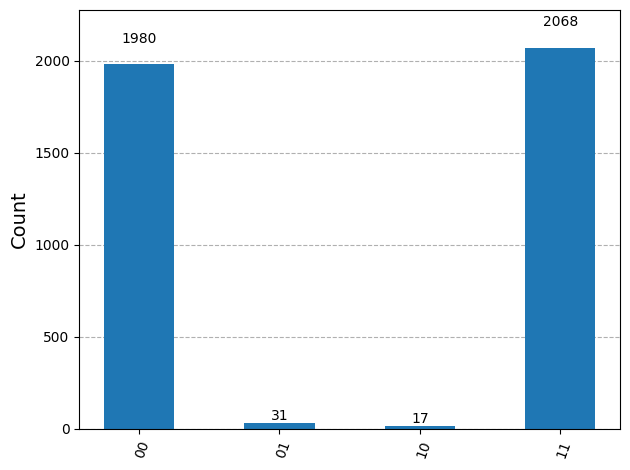

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler

service = QiskitRuntimeService()
backend = service.backend("ibm_rensselaer", instance="rpi-rensselaer/classes/itws-4940-callab")

qc = QuantumCircuit(2)
qc.h(0)
#qc.h(1)
qc.cx(0,1)
qc.measure_all()

pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"job id: {job.job_id()}")

result = job.result()
print(result)

# Get results from Databin
pub_result = result[0]
counts = pub_result.data.meas.get_counts()
print(f"Counts for the meas output register: {counts}")

# Plot results
from qiskit.visualization import plot_histogram
plot_histogram(counts)